rotate 45 degrees


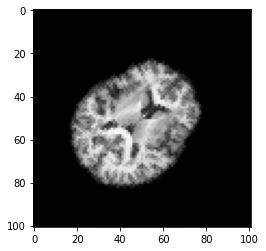

rotate -90 degrees


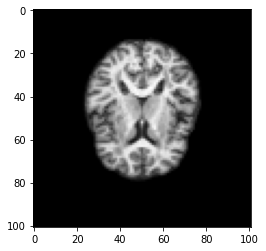

enlarge image


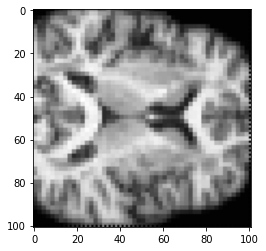

shrink image


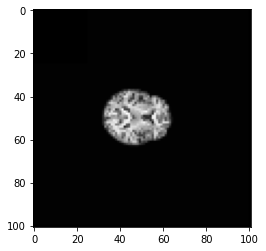

shear


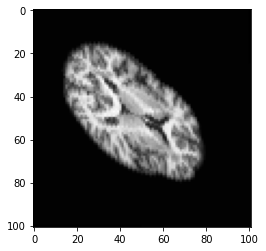

reflection


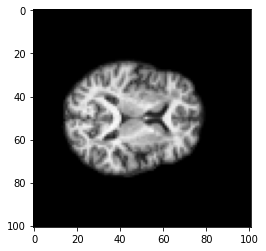

translation


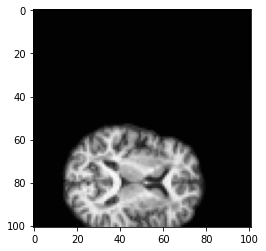

translation and shear


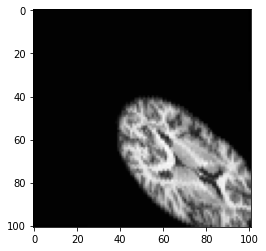

In [1]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# create [3]x[pixels number] array with the coordinates of the pixels of the image
def create_coordinates(img):
    
    coor_in=[] # create empty array to add all pairs of coordinates
    img_len=int(len(img)) # store the lenght of the input image

    
    # Note:array contains 3 arrays of size height*width.
    
    # we need to edit the image from the center (0,0).So we will need positive values to express the direction to
    # the right and up,and negative values to express the direction to left and down.That is the reason we need
    # to find the midle (img_len//2).
    
    # we will create the coordinates array in 3 phases.
    
    # phase 1 .
    all_x=[] # The fist array contains all elements of x axis
    for length_y in range(img_len):
        for y in range(-img_len//2+1,img_len//2+1):
            all_x.append(y)
    coor_in.append(all_x) # add all_x to the main array (coor_in) with coordinates

    # phase 2
    all_y=[]# The first array contains all elements of y axis
    for y in range(-img_len//2+1,img_len//2+1):
        for length_y in range(img_len):
            all_y.append(y)
    coor_in.append(all_y) # add all_y to the main array (coor_in) with coordinates

    # phase 3
    # Create array full of ones.This array does not give us any information,
    # it is just necessary for the multiplication with the 3x3 Taffine array
    ones=[1]*(img_len*img_len)
    coor_in.append(ones) # add new_ones to the main array (coor_in) with coordinates

    return coor_in # the array with all pair of cordinates is ready so we return 

#create 3x3 T affine array with input a1..a6 
def create_T_affine(a1,a2,a3,a4,a5,a6):
    
    T_affine=[[a1,a2,a3],[a4,a5,a6],[0,0,1]]
    return T_affine


#create output image with the same size as input image 
def create_output_image(a1,a2,a3,a4,a5,a6):
    
    # create np array by input image
    img_in = np.array(Image.open('brain.png')) 
    
     #create np array with cordinates of each pixel of the image
    coor_in=np.array(create_coordinates(img_in))
    
    # create T_affine np array 
    T_affine=np.array(create_T_affine(a1,a2,a3,a4,a5,a6)) 
    
    # create the new coordinates of each pixel of the image from the  multiplication of coor_in and T_affine
    coor_out=np.array(T_affine@coor_in)
                                        
    # create new np array to copy the pixels of the input image to the suitble coordinates.
    # The new image must have the same height and width as input image
    # initialize an array full of -1.This will help us after to find out which pixel hasn't been valued
    img_out=np.full((len(img_in),len(img_in[0])), -1, dtype=int)

    #store the half of the input image's length                                       
    mid=len(img_in)//2

    # run the np array of coor_in and coor_out to get the pair of old and new coordinates
    for i in range(len(img_in)*len(img_in)): 
                                            
        #Note:the pairs of coordinates in coor_in and coor_out are in columns
        
        #get (x,y) in column i of coor_in array
        x_in=coor_in[0][i] 
        y_in=coor_in[1][i]
        
        #get (x,y) in column i of coor_out array
        x_out=int(coor_out[0][i])
        y_out=int(coor_out[1][i])
        
        # given that the centre is the (0,0),if x_out or y_out is out of bounds skip them
        if x_out<=mid and x_out>=-mid and y_out<=mid and y_out>=-mid:                                                 
                                                                     
            # the pixel that is located to cordinate (x_in,y_in) of input image must be copied to the 
            # cordinate (x_out,y_out) of the new output image(img_out)
            img_out[mid+x_out][mid+y_out]=img_in[mid+x_in][mid+y_in] 
            
    # run the array of output image(img_out) to check if pixel hasn't been valued
    for x in range(-mid,mid):
        for y in range(-mid,mid):\
            
            # if the value of pixel is equal to -1 that means it has not been valued,
            # so we have to find out the closest neighbor with value and give a similar one
            if img_out[mid+x][mid+y]==-1: 
                                          
                # horizontal investigation to the positive x axis
                x1=x
                y1=y
                while True:
                    
                    # if x1 is out of bounds that means it didn't found pixel with value through positive x axis  
                    if x1>mid:  
                        break
                     # if pixel with value has been found
                    
                    elif img_out[mid+x1][mid+y1]!=-1:
                         # copy this value to the not edited pixel(value=-1)
                        img_out[mid+x][mid+y]=img_out[mid+x1][mid+y1]
                        break
                        
                    # increase x1 to continue the investigation
                    x1=x1+1
                    
                # vertical investigation to the negative y axis
                y2=y
                x2=x
                while True:
                  
                # if y2 is out of bounds that means it didn't found pixel with value through negative y axis 
                    if y2 < -mid:
                        break
                     # if pixel with value has been found
                    
                    elif img_out[mid+x2][mid+y2]!=-1:
                         # copy this value to the not edited pixel(value=-1)
                        img_out[mid+x][mid+y]=img_out[mid+x2][mid+y2] 
                        break
                        
                    # decrease y2 to continue the investigation
                    y2=y2-1
                    
                # horizontal investigation to the negative x axis
                x3=x
                y3=y
                while True:
                    
                    # if x3 is out of bounds that means it didn't found pixel with value through negative x axis
                    if x3< -mid: 
                        break
                        
                    # if pixel with value has been found
                    elif img_out[mid+x3][mid+y3]!=-1:
                         # copy this value to the not edited pixel(value=-1)
                        img_out[mid+x][mid+y]=img_out[mid+x3][mid+y3] 
                        break
                    
                    # decrease x3 to continue the investigation
                    x3=x3-1

                # vertical investigation to the positive y axis
                x4=x
                y4=y
                while True:
                    
                    # if y4 is out of bounds that means it didn't found pixel with value through positive y axis 
                    if y4> mid:
                        break
                        
                    # if pixel with value has been found
                    elif img_out[mid+x4][mid+y4]!=-1:
                        # copy this value to the not edited pixel(value=-1)
                        img_out[mid+x][mid+y]=img_out[mid+x4][mid+y4] 
                        break
                    # increase y4 to continue the investigation
                    y4=y4+1 

    plt.imshow(img_out,cmap="gray")
    plt.show()
    return;
print("rotate 45 degrees")
create_output_image(0.7,-0.7,0,0.7,0.7,0)#rotate
print("rotate -90 degrees")
create_output_image(0,1,0,-1,0,0)#rotate
print("enlarge image" )
create_output_image(2 ,0 ,0 ,0 ,2,0)#scale,enlarge the image
print("shrink image")
create_output_image(0.5 ,0 ,0 ,0 ,0.5 ,0)#scale,shrink the image
print("shear")
create_output_image(1,0.5,0,0,1,0) #shear
print("reflection")
create_output_image(-1,0,0,0,1,0)#reflection
print("translation")
create_output_image(1,0,30,0,1,0)#translation
print("translation and shear")
create_output_image(1,0.5,25,0,1,25)#translation and shear



